# Decision (Tree) Linear Regression
Plot each predictor against the predicted friend circle size and compare against the actual data points. Some calibration is needed.

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [5]:
# Receive dataframe from Preprocessing
%store -r pre_df

# Converge personality into one column and remove the other columns.
# 1 = extrovert; 0 = introvert
pre_df["Personality"] = pre_df["Personality_Extrovert"]
pre_df = pre_df.drop(["Personality_Extrovert", "Personality_Introvert"], axis="columns")

# Save predictors array for re-use
predictors = ["Time_spent_Alone", "Post_frequency", "Going_outside", "Social_event_attendance"]

## Transform Data
The data is not normally distributed and will need to be transformed in some way. We can scale predictors as proportions $\frac{x}{max(x)}$, as each predictor has a different survey scale range (0-5, 0-7, 0-11, etc). Or we can apply natural log or square root operations to each predictor.

In [6]:
# Apply transformation to each variable

def transform(dataframe):
    for column in predictors:
        # Get proportion of responses.
        dataframe[column] = dataframe[column] / max(pre_df[column])

        # Apply log transform
        # dataframe[column] = np.where(dataframe[column] > 0, np.log(dataframe[column]), np.nan)

        # Apply square root transformation
        # dataframe[column] = np.sqrt(dataframe[column])

In [7]:
train_df = pre_df.sample(frac=0.8, random_state=1863)
transform(train_df)
test_df = pre_df.drop(train_df.index)
transform(test_df)

## Predict Using Test Dataframe

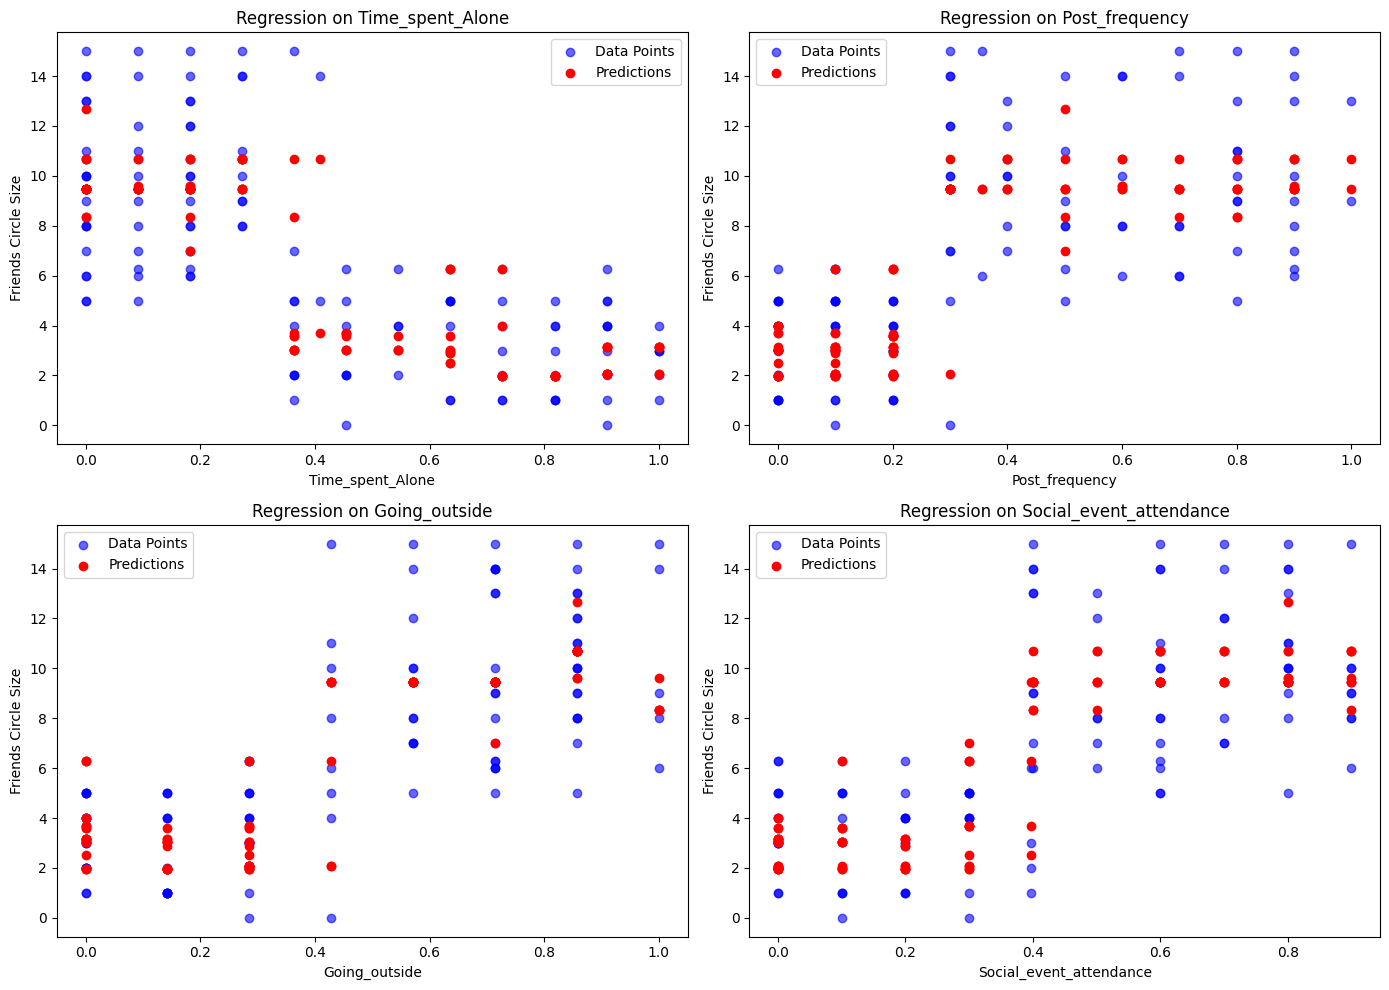

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, predictor in enumerate(predictors):
    ax = axs[i]
    X = test_df.drop('Friends_circle_size', axis=1)
    y = test_df['Friends_circle_size']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1863)

    # Create a DecisionTreeRegressor instance with maximum depth of 5
    dt_model = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)

    ax.scatter(
        x=X_test[predictor],
        y=y_test,
        color="blue",
        alpha=0.6,
        label="Data Points"
    )
    ax.scatter(X_test[predictor], y_pred, color='red', label='Predictions')

    ax.set_title(f'Regression on {predictor}')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Friends Circle Size')
    ax.legend()
plt.tight_layout()
plt.show()